In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely import Point, Polygon, unary_union


# Read in files and make column names descriptive
ct_gdf = gpd.read_file('./Census tract - Percentage of visible minority/Census tract - Percentage of visible minority, n.i.e..shp')
ct_gdf.rename(columns={'Value': 'Percentage of Home Ownership 2021'}, inplace=True)

In [2]:
ct_gdf['centroid'] = ct_gdf.geometry.centroid

In [3]:
centroid_points = gpd.GeoSeries(ct_gdf['centroid'].values)

<Axes: >

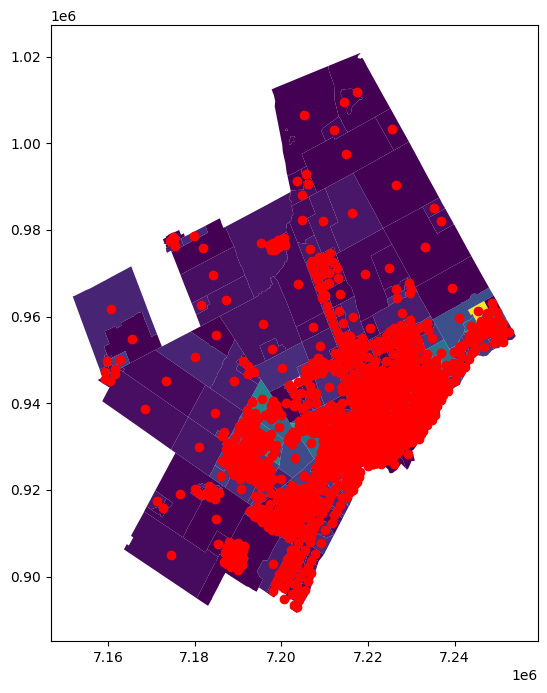

In [4]:
fig, ax = plt.subplots(figsize = (8,8))

ct_gdf.plot(column='Percentage of Home Ownership 2021', ax = ax)
centroid_points.plot(color='red', ax = ax)

In [5]:
from osmnx import graph_from_place, graph_to_gdfs

walking_network = graph_from_place('Wallace Emerson, Toronto, Ontario, Canada', network_type='walk')

walking_nodes, walking_edges = graph_to_gdfs(walking_network)

<Axes: >

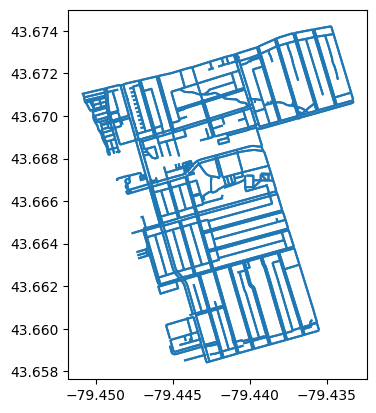

In [6]:
walking_edges.plot()

In [7]:
#from r5py import TransportNetwork
import os
os.environ['JAVA_HOME'] = r"C:\Program Files\Java\jdk-25\bin"
import r5py

In [8]:
pbf_path = r"C:\Users\saman\Downloads\GGR375 Project\GGR375-Group-Project\Toronto.osm.pbf "
gtfs_path = r"C:\Users\saman\Downloads\GGR375 Project\GGR375-Group-Project\GTFS_2015.zip"

tn = r5py.TransportNetwork(pbf_path, gtfs = gtfs_path)

In [40]:
origin = walking_nodes.geometry.values[4]
origin_series = gpd.GeoSeries([origin, walking_nodes.geometry.values[50]])
origin_snapped = tn.snap_to_network(origin_series, radius = 500, street_mode=r5py.TransportMode.WALK)
print(origin_snapped)
print(type(origin))

0    POINT (-79.43437 43.67046)
1    POINT (-79.44575 43.66496)
dtype: geometry
<class 'shapely.geometry.point.Point'>


In [ ]:
import datetime
origins_gdf = gpd.GeoDataFrame({'id' : [1,2], "geometry": origin_snapped}, crs = ct_gdf.crs)
print(origins_gdf)

isochrones2 = r5py.Isochrones(
    tn,
    origins = origin,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[15]
)

   id                geometry
0   1   POINT (-79.434 43.67)
1   2  POINT (-79.446 43.665)


C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\r5py\r5\regional_task.py:199: RuntimeWarning: The currently loaded GTFS data sets do not define any services on 2015-02-22.
  warnings.warn(
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\r5py\r5\regional_task.py:199: RuntimeWarning: The currently loaded GTFS data sets do not define any services on 2015-02-22.
  warnings.warn(


      travel_time                                           geometry
0 0 days 00:15:00  MULTILINESTRING ((-79.44347 43.67157, -79.4415...


<Axes: >

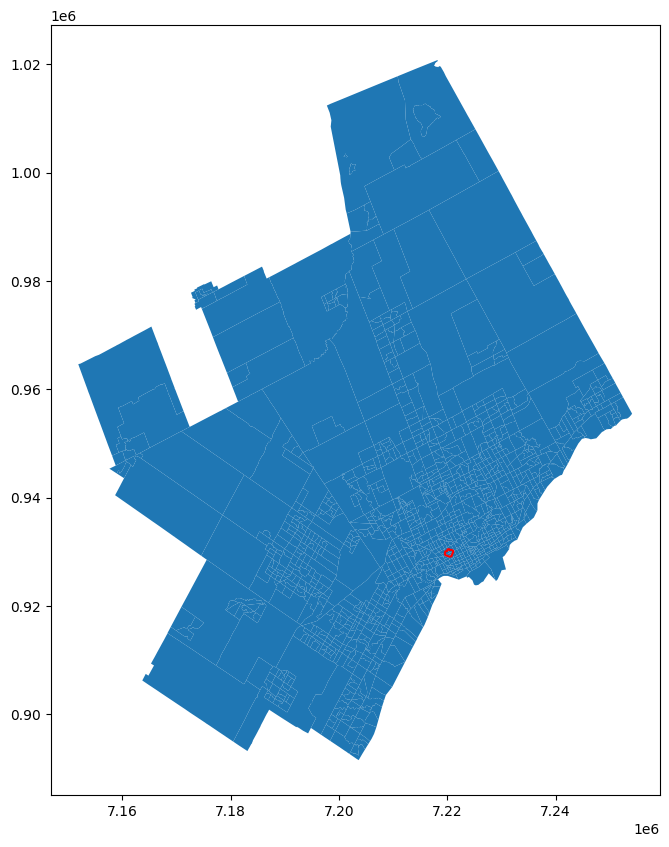

In [66]:
print(isochrones2)
fig, ax2 = plt.subplots(figsize = (10,10))

ct_gdf.plot(ax=ax2)
isochrones2 = isochrones2.to_crs(ct_gdf.crs)

isochrones2.plot(color = 'red', ax=ax2)

In [ ]:
print(type(r5py.TransportMode.TRANSIT))
# maybe i need to snap my point to network
print(type(tn.transit_layer))
o_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': origin}, crs = 'EPSG:4326')
# it = r5py.DetailedItineraries(tn, 
#                               o_gdf, 
#                               #departure_time=datetime.datetime(2022, 2, 22, 8, 30),
#                               transport_modes=[r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
#                               breakdown=True)

<enum 'TransportMode'>
<class 'r5py.r5.transit_layer.TransitLayer'>


,travel_time,geometry


In [ ]:
isochrones3 = r5py.Isochrones(
    tn,
    origins = origin,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[15, 30, 45]
)

ct_gdf.plot(ax=ax2)
isochrones3 = isochrones3.to_crs(ct_gdf.crs)
print(isochrones3)

isochrones3.plot(color = 'red', ax=ax2)

<Axes: >

Index(['travel_time', 'geometry'], dtype='object')


,travel_time,geometry
0,0 days 00:15:00,"MULTILINESTRING ((7219778.895 930997.746, 7219..."
1,0 days 00:30:00,"MULTILINESTRING ((7224979.319 930932.965, 7224..."
2,0 days 00:45:00,"MULTILINESTRING ((7231484.953 934800.916, 7231..."


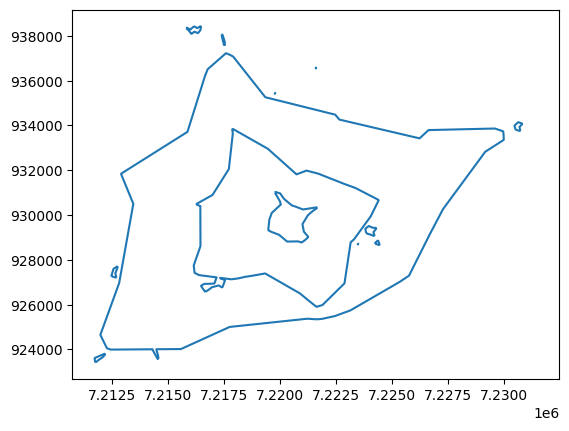

In [ ]:
#fig, ax2 = plt.subplots()

#ct_gdf.plot(ax=ax2)
isochrones3 = isochrones3.to_crs(ct_gdf.crs)
#isochrones3.plot(ax=ax2)

isochrones3.plot()
print(isochrones3.columns)
isochrones3.head()